In [1]:
# Imports
# import marimo as mo
# import plotly.express as px
# import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle


## Generating data
Let's imagine that we've collected two types of data from a smart watch:
- Average acceleration in m/s2 - an indicator of movement
- Heart rate in beats per minute (bpm)

We'll let acceleration be our first feature ($x_1$) and heart rate be the second
feature ($x_2$). 

We'll generate data from two "clusters" of points with different mean values and
different "spread". For clarity of the example, we'll create classes that are easily
separable.  

In [ ]:
# Parameters
# n_samples_per_class = 100

# acc_rest_scale = 0.3
# acc_exercise_mean = 1.7
# acc_exercise_std = 0.65

# hr_rest_mean = 75
# hr_exercise_mean = 130
# hr_rest_std = 15 # 10
# hr_exercise_std = 23

# n_samples_per_class = 50
n_samples_rest = 50
n_samples_excercise = 150

acc_rest_scale = 0.3
acc_exercise_mean = 1.6  # 1.7
acc_exercise_std = 0.60  # 0.35

hr_rest_mean = 75
hr_exercise_mean = 140  # 135
hr_rest_std = 15  # 10
hr_exercise_std = 26  # 20

In [3]:
rdg = np.random.default_rng(seed=42)

In [ ]:
# Generate random data
rest_acc = np.atleast_2d(rdg.exponential(scale=acc_rest_scale, size=n_samples_rest)).T
rest_hr = np.atleast_2d(
    rdg.normal(loc=hr_rest_mean, scale=hr_rest_std, size=n_samples_rest)
).T
excercise_acc = np.atleast_2d(
    rdg.normal(loc=acc_exercise_mean, scale=acc_exercise_std, size=n_samples_excercise)
).T
excercise_hr = np.atleast_2d(
    rdg.normal(loc=hr_exercise_mean, scale=hr_exercise_std, size=n_samples_excercise)
).T

# "Stack" into data and labels
rest_data = np.hstack((rest_acc, rest_hr))
rest_labels = np.zeros((n_samples_rest))
excercise_data = np.hstack((excercise_acc, excercise_hr))
excercise_labels = np.ones((n_samples_excercise))

X = np.vstack((rest_data, excercise_data))
y = np.concat((rest_labels, excercise_labels))

X, y = shuffle(X, y, random_state=42)

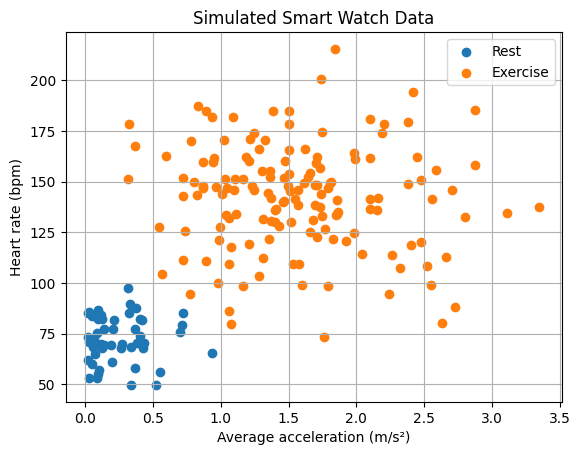

In [5]:
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Rest")
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Exercise")
plt.xlabel("Average acceleration (m/s²)")
plt.ylabel("Heart rate (bpm)")
plt.title("Simulated Smart Watch Data")
plt.grid(True)
plt.legend()
plt.show()

In [6]:
# Save to CSV
y_category = np.where(y == 0, "rest", "exercise")
df = pl.DataFrame(
    {
        "acceleration (m/s2)": X[:, 0],
        "heart_rate (bpm)": X[:, 1],
        "state": y_category,
        "state_int": y.astype(int),
    }
)
df.write_csv("simple_acc_hr_dataset_v2.csv")